In [2]:
import pandas as pd
import datetime
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
rcParams['font.size']=16

In [4]:
def convert_str_to_datetime(date_str):
    # convert from m/d/YY to datetime object
#     print(date_str)
    date_str='{}/{}/20{}'.format(date_str.split('/')[0],date_str.split('/')[1],date_str.split('/')[2])
#     print(date_str)
    date_time_obj = datetime.datetime.strptime(date_str, '%m/%d/%Y')
    return date_time_obj.date()

2014
96
2015
205
2016
303
2017
367


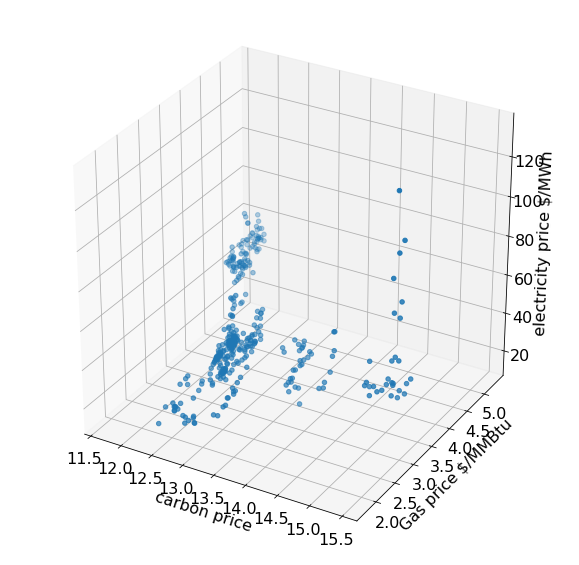

In [14]:
elec_market_name='NP15 EZ Gen DA LMP Peak'
gas_market_name='PG&E - Citygate'
#retrieve electricity price data
df_all_NP15=pd.DataFrame()
for year in ['2014','2015','2016','2017']:
    print(year)
    #load electricity price data
    df_data=pd.read_excel('raw data/overall/ice_electric-{}final.xlsx'.format(year))
    df_data['Delivery date']=[x.date() for x in df_data['Delivery start date']]
    df_data['Previous Delivery date'] = [x-datetime.timedelta(1) for x in df_data['Delivery date']]

    # extract only NP15 hub
    df_temp_elec=df_data.drop(list(np.where(df_data['Price hub']!='{}'.format(elec_market_name))[0])).copy()
    df_temp_elec.reset_index(inplace=True)

    #constuct NP15 dataframe
    df_NP15=pd.DataFrame()
    df_NP15['Trade date']=df_temp_elec['Previous Delivery date']
    df_NP15['Average NP15 Elec price $/MWh']=df_temp_elec['Wtd avg price $/MWh']
    df_NP15['High NP15 Elec price $/MWh']=df_temp_elec['High price $/MWh']
    df_NP15['Low NP15 Elec price $/MWh']=df_temp_elec['Low price $/MWh']
    df_NP15['Daily volume MWh']=df_temp_elec['Daily volume MWh']

    #load gas price data
    df_gas_data=pd.read_excel('raw data/overall/ice_natgas-{}final.xlsx'.format(year))
    df_gas_data['Delivery date']=[x.date() for x in df_gas_data['Delivery start date']]
    df_gas_data['Previous Delivery date'] = [x-datetime.timedelta(1) for x in df_gas_data['Delivery date']]

    # extract only PG&E - Citygate hub
    df_temp_gas=df_gas_data.drop(list(np.where(df_gas_data['Price hub']!='{}'.format(gas_market_name))[0])).copy()
    df_temp_gas.reset_index(inplace=True)
    
    df_NP15['High price $/MMBtu']=[df_temp_gas['High price $/MMBtu'][np.where(df_temp_gas['Previous Delivery date']==date)[0][0]] if date in list(df_temp_gas['Previous Delivery date']) else 'None' for date in df_NP15['Trade date']]
    df_NP15['Low price $/MMBtu']=[df_temp_gas['Low price $/MMBtu'][np.where(df_temp_gas['Previous Delivery date']==date)[0][0]] if date in list(df_temp_gas['Previous Delivery date']) else 'None' for date in df_NP15['Trade date']]
    df_NP15['Wtd avg price $/MMBtu']=[df_temp_gas['Wtd avg price $/MMBtu'][np.where(df_temp_gas['Previous Delivery date']==date)[0][0]] if date in list(df_temp_gas['Previous Delivery date']) else 'None' for date in df_NP15['Trade date']]
    df_NP15['Daily volume MMBtu']=[df_temp_gas['Daily volume MMBtu'][np.where(df_temp_gas['Previous Delivery date']==date)[0][0]] if date in list(df_temp_gas['Previous Delivery date']) else 'None' for date in df_NP15['Trade date']]

    # remove non day with gas price
    df_NP15=df_NP15.drop(list(np.where(df_NP15['High price $/MMBtu']=='None')[0])).copy()
    df_NP15.reset_index(inplace=True)
    
    #load emission data
    df_emission_data=pd.read_csv('raw data/CAISO/Cali_carbon_dash.csv')
    df_emission_data.dropna(axis=0, inplace=True)
    df_emission_data.reset_index(inplace=True, drop=False)
    del df_emission_data['index']
    df_emission_data['New date']=[convert_str_to_datetime(x) for x in df_emission_data['date']]
#     df_emission_data.head()

    #update carbon price data
    df_NP15['Carbon price'] = [df_emission_data['Price'][np.where(df_emission_data['New date']==date)[0][0]] if date in list(df_emission_data['New date']) else 'None' for date in df_NP15['Trade date']]
#     print(df_NP15.head())

    # remove non day with carbon price
    df_NP15=df_NP15.drop(list(np.where(df_NP15['Carbon price']=='None')[0])).copy()
    df_NP15.reset_index(inplace=True)
#     print(df_NP15.head())
    
    frames=[df_all_NP15, df_NP15]
    df_all_NP15 = pd.concat(frames)
    df_all_NP15.reset_index(drop=True)
    print(len(df_all_NP15))
df_all_NP15.to_excel("cleansing_data_californai_NP15.xlsx")
#     print(df_all_NP15)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs=df_all_NP15['Carbon price']
ys=df_all_NP15['Wtd avg price $/MMBtu']
zs=df_all_NP15['Average NP15 Elec price $/MWh']

ax.scatter(xs, ys, zs, marker='o')

ax.set_xlabel('carbon price')
ax.set_ylabel('Gas price $/MMBtu')
ax.set_zlabel('electricity price $/MWh')

plt.show()

In [1]:
#plotting

2014
136
2015
317
2016
497
2017
658


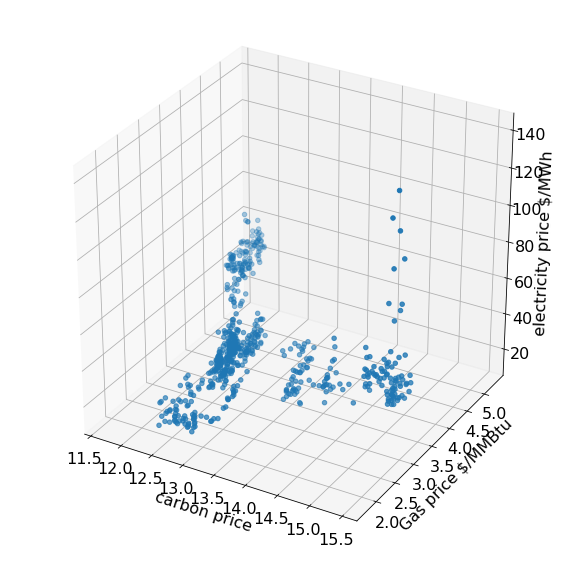

In [16]:
elec_market_name='SP15 EZ Gen DA LMP Peak'
gas_market_name='PG&E - Citygate'
#retrieve electricity price data
df_all_SP15=pd.DataFrame()
for year in ['2014','2015','2016','2017']:
    print(year)
    #load electricity price data
    df_data=pd.read_excel('raw data/overall/ice_electric-{}final.xlsx'.format(year))
    df_data['Delivery date']=[x.date() for x in df_data['Delivery start date']]
    df_data['Previous Delivery date'] = [x-datetime.timedelta(1) for x in df_data['Delivery date']]

    # extract only NP15 hub
    df_temp_elec=df_data.drop(list(np.where(df_data['Price hub']!='{}'.format(elec_market_name))[0])).copy()
    df_temp_elec.reset_index(inplace=True)

    #constuct SP15 dataframe
    df_SP15=pd.DataFrame()
    df_SP15['Trade date']=df_temp_elec['Previous Delivery date']
    df_SP15['Average SP15 Elec price $/MWh']=df_temp_elec['Wtd avg price $/MWh']
    df_SP15['High SP15 Elec price $/MWh']=df_temp_elec['High price $/MWh']
    df_SP15['Low SP15 Elec price $/MWh']=df_temp_elec['Low price $/MWh']
    df_SP15['Daily volume MWh']=df_temp_elec['Daily volume MWh']

    #load gas price data
    df_gas_data=pd.read_excel('raw data/overall/ice_natgas-{}final.xlsx'.format(year))
    df_gas_data['Delivery date']=[x.date() for x in df_gas_data['Delivery start date']]
    df_gas_data['Previous Delivery date'] = [x-datetime.timedelta(1) for x in df_gas_data['Delivery date']]

    # extract only PG&E - Citygate hub
    df_temp_gas=df_gas_data.drop(list(np.where(df_gas_data['Price hub']!='{}'.format(gas_market_name))[0])).copy()
    df_temp_gas.reset_index(inplace=True)
    
    df_SP15['High price $/MMBtu']=[df_temp_gas['High price $/MMBtu'][np.where(df_temp_gas['Previous Delivery date']==date)[0][0]] if date in list(df_temp_gas['Previous Delivery date']) else 'None' for date in df_SP15['Trade date']]
    df_SP15['Low price $/MMBtu']=[df_temp_gas['Low price $/MMBtu'][np.where(df_temp_gas['Previous Delivery date']==date)[0][0]] if date in list(df_temp_gas['Previous Delivery date']) else 'None' for date in df_SP15['Trade date']]
    df_SP15['Wtd avg price $/MMBtu']=[df_temp_gas['Wtd avg price $/MMBtu'][np.where(df_temp_gas['Previous Delivery date']==date)[0][0]] if date in list(df_temp_gas['Previous Delivery date']) else 'None' for date in df_SP15['Trade date']]
    df_SP15['Daily volume MMBtu']=[df_temp_gas['Daily volume MMBtu'][np.where(df_temp_gas['Previous Delivery date']==date)[0][0]] if date in list(df_temp_gas['Previous Delivery date']) else 'None' for date in df_SP15['Trade date']]

    # remove non day with gas price
    df_SP15=df_SP15.drop(list(np.where(df_SP15['High price $/MMBtu']=='None')[0])).copy()
    df_SP15.reset_index(inplace=True)
    
    #load emission data
    df_emission_data=pd.read_csv('raw data/CAISO/Cali_carbon_dash.csv')
    df_emission_data.dropna(axis=0, inplace=True)
    df_emission_data.reset_index(inplace=True, drop=False)
    del df_emission_data['index']
    df_emission_data['New date']=[convert_str_to_datetime(x) for x in df_emission_data['date']]
#     df_emission_data.head()

    #update carbon price data
    df_SP15['Carbon price'] = [df_emission_data['Price'][np.where(df_emission_data['New date']==date)[0][0]] if date in list(df_emission_data['New date']) else 'None' for date in df_SP15['Trade date']]
#     print(df_NP15.head())

    # remove non day with carbon price
    df_SP15=df_SP15.drop(list(np.where(df_SP15['Carbon price']=='None')[0])).copy()
    df_SP15.reset_index(inplace=True)
#     print(df_NP15.head())
    
    frames=[df_all_SP15, df_SP15]
    df_all_SP15 = pd.concat(frames)
    df_all_SP15.reset_index(drop=True)
    print(len(df_all_SP15))
df_all_SP15.to_excel("cleansing_data_californai_SP15.xlsx")
#     print(df_all_NP15)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs=df_all_SP15['Carbon price']
ys=df_all_SP15['Wtd avg price $/MMBtu']
zs=df_all_SP15['Average SP15 Elec price $/MWh']

ax.scatter(xs, ys, zs, marker='o')

ax.set_xlabel('carbon price')
ax.set_ylabel('Gas price $/MMBtu')
ax.set_zlabel('electricity price $/MWh')

plt.show()

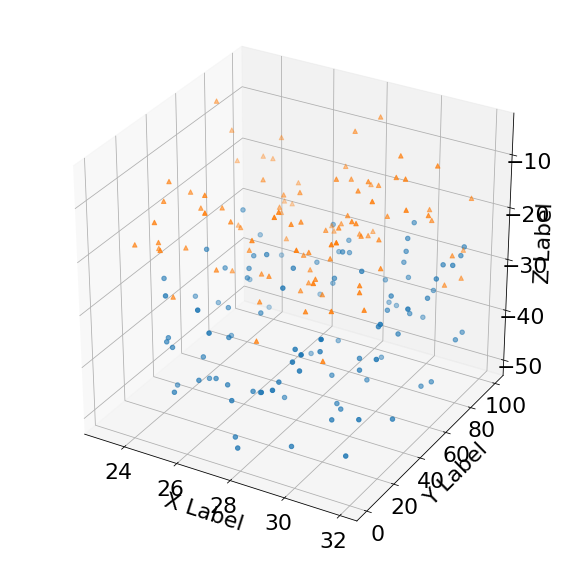

In [3]:


# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


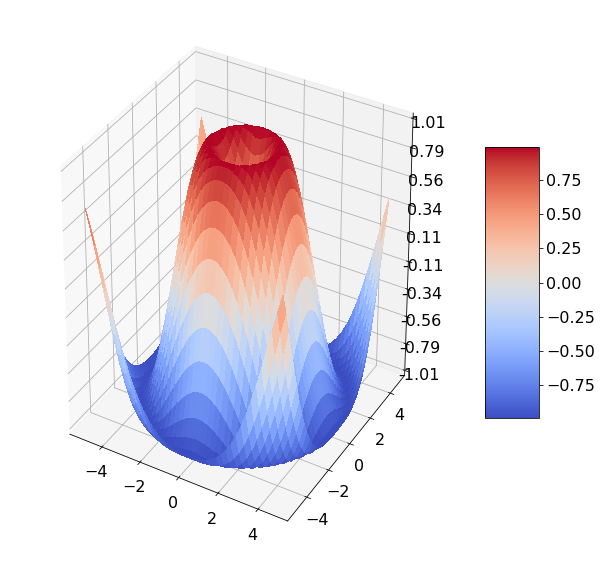

In [10]:
'''
======================
3D surface (color map)
======================

Demonstrates plotting a 3D surface colored with the coolwarm color map.
The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the
z axis tick labels.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
